In [1]:
#import src.funcs as ff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from pylab import figure, close

plt.style.use('dark_background')

In [2]:
!ls -la ../data

total 1233840
drwxr-xr-x 3 jim jim   1478656 Jul 10 16:26 .
drwxr-xr-x 9 jim jim      4096 Jul 11 20:20 ..
-rw-r--r-- 1 jim jim 327001271 Jun 26 21:06 champs-scalar-coupling.zip
-rw-r--r-- 1 jim jim   3295704 May 29 16:34 dipole_moments.csv
-rw-r--r-- 1 jim jim 136330425 May 29 16:33 magnetic_shielding_tensors.csv
-rw-r--r-- 1 jim jim  44004703 May 29 16:32 mulliken_charges.csv
drwxr-xr-x 2 jim jim      4096 Jul 13 20:32 postproc
-rw-r--r-- 1 jim jim   2285646 May 29 16:33 potential_energy.csv
-rw-r--r-- 1 jim jim  25055448 May 29 16:33 sample_submission.csv
-rw-r--r-- 1 jim jim 293159210 May 29 16:33 scalar_coupling_contributions.csv
-rw-r--r-- 1 jim jim 141716726 May 29 16:32 structures.csv
-rw-r--r-- 1 jim jim  87888660 May 29 16:33 test.csv
-rw-r--r-- 1 jim jim 201175375 May 29 16:33 train.csv


In [3]:
df_contrib = pd.read_csv("../data/scalar_coupling_contributions.csv")
train = pd.read_csv('../data/train.csv')

In [4]:
df_contrib.head()

molecule_name  atom_index_0  atom_index_1  type       fc        sd  \
0  dsgdb9nsd_000001             1             0  1JHC  83.0224  0.254579   
1  dsgdb9nsd_000001             1             2  2JHH -11.0347  0.352978   
2  dsgdb9nsd_000001             1             3  2JHH -11.0325  0.352944   
3  dsgdb9nsd_000001             1             4  2JHH -11.0319  0.352934   
4  dsgdb9nsd_000001             2             0  1JHC  83.0222  0.254585   

       pso       dso  
0  1.25862  0.272010  
1  2.85839 -3.433600  
2  2.85852 -3.433870  
3  2.85855 -3.433930  
4  1.25861  0.272013

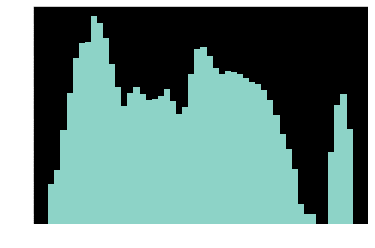

In [5]:
plt.hist(train['scalar_coupling_constant'], bins=50, log=1);

# > Contributions:

## * `fc` : Fermi contact
## * `sd` : spin-dipolar
## * `pso` : Paramagnetic spin-orbit contribution
## * `dso` : Diamagnetic spin-orbit contribution

/home/jim/anaconda/envs/kgg_mole/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


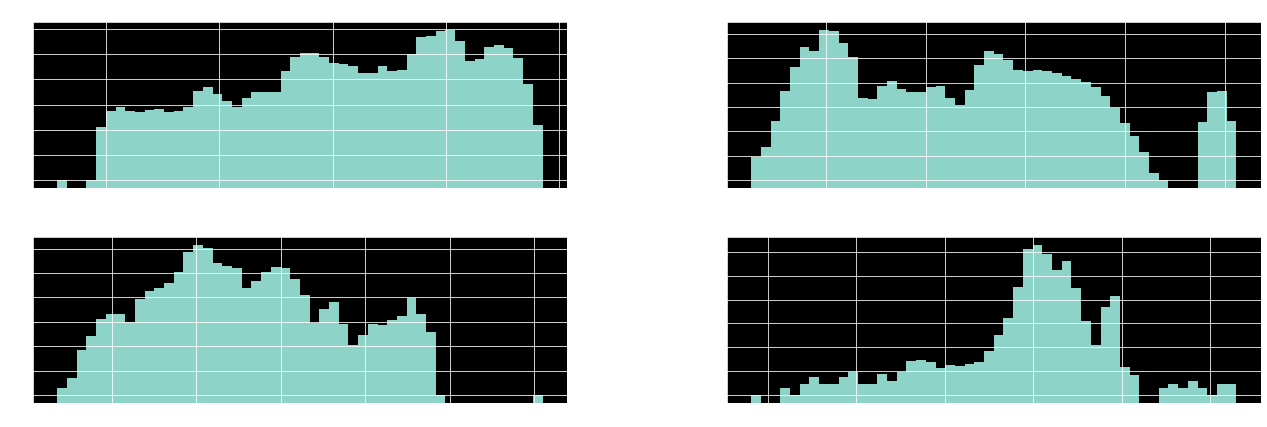

In [6]:
fig = figure(1, figsize=(22, 7)); #plt.figure(figsize=(22, 15))
ax  = fig.add_subplot(111);
df_contrib[["fc", "sd", "pso", "dso"]].hist(bins=50, ax=ax, log=1);

# > `pso`: Spin-Orbit contribution (Paramagnetic)

<BarContainer object of 8 artists>

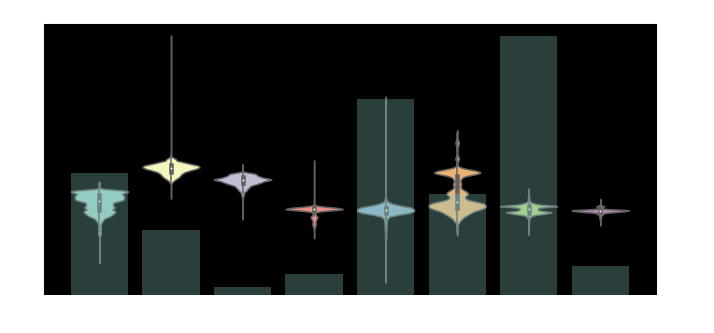

In [7]:
plt.figure(figsize=(11,5))
_ax = sns.violinplot(x='type', y='pso', data=df_contrib, scale='width');
plt.title('Violinplot of XXX by type');

type_counts = train["type"].value_counts()
_types  = [ _.get_text() for _ in _ax.get_xticklabels() ]
_ntypes = [ type_counts[_nm] for _nm in _types ]

_ax2 = _ax.twinx()
_ax2.bar(_types, _ntypes, alpha=0.3)

# > `dso`: Spin-Orbit contribution (Diamagnetic)

<BarContainer object of 8 artists>

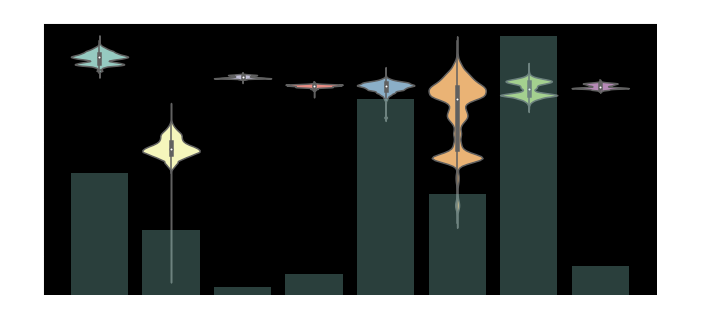

In [8]:
plt.figure(figsize=(11,5))
_ax = sns.violinplot(x='type', y='dso', data=df_contrib, scale='width');
plt.title('Violinplot of XXX by type');

type_counts = train["type"].value_counts()
_types  = [ _.get_text() for _ in _ax.get_xticklabels() ]
_ntypes = [ type_counts[_nm] for _nm in _types ]

_ax2 = _ax.twinx()
_ax2.bar(_types, _ntypes, alpha=0.3)

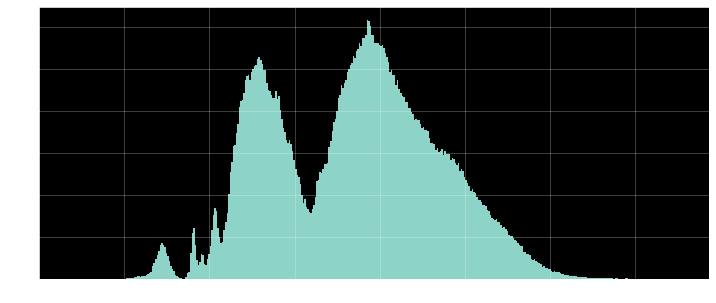

In [41]:
plt.figure(figsize=(12,5))
cc = df_contrib["type"]=="1JHC"
df_contrib["dso"][cc].hist(bins=400)
plt.grid(alpha=0.3)

# > `sd`: Spin-Dipolar contribution (Diamagnetic)

In [9]:
sns.violinplot?

(-0.25, 0.5)

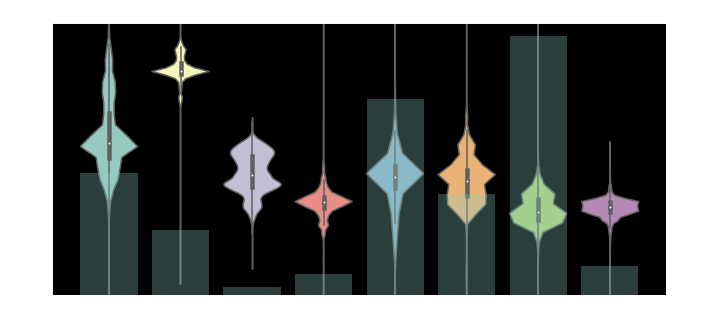

In [10]:
plt.figure(figsize=(11,5))
_ax = sns.violinplot(x='type', y='sd', data=df_contrib, scale='width');
plt.title('Violinplot of XXX by type');

type_counts = train["type"].value_counts()
_types  = [ _.get_text() for _ in _ax.get_xticklabels() ]
_ntypes = [ type_counts[_nm] for _nm in _types ]

_ax2 = _ax.twinx()
_ax2.bar(_types, _ntypes, alpha=0.3)

_ax.set_ylim(-0.25, 0.50)

# > `fc`: Fermi Contact contribution (Diamagnetic)

(-25, 150)

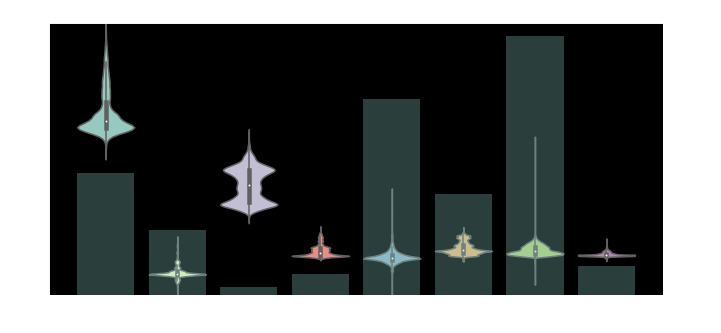

In [11]:
plt.figure(figsize=(11,5))
_ax = sns.violinplot(x='type', y='fc', data=df_contrib, scale='width');
plt.title('Violinplot of XXX by type');

type_counts = train["type"].value_counts()
_types  = [ _.get_text() for _ in _ax.get_xticklabels() ]
_ntypes = [ type_counts[_nm] for _nm in _types ]

_ax2 = _ax.twinx()
_ax2.bar(_types, _ntypes, alpha=0.3)

_ax.set_ylim(-25, 150)